# Customer Lifetime Value Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [6]:
df = pd.read_csv("data/customer_data.csv")
df.head()

,CustomerID,Recency,Frequency,MonetaryValue,Tenure,CLV
0,1001,10,15,5000,12,15000
1,1002,30,5,1500,6,4500
2,1003,5,25,8500,18,25000
3,1004,20,10,3000,10,9000
4,1005,15,12,4000,9,12000


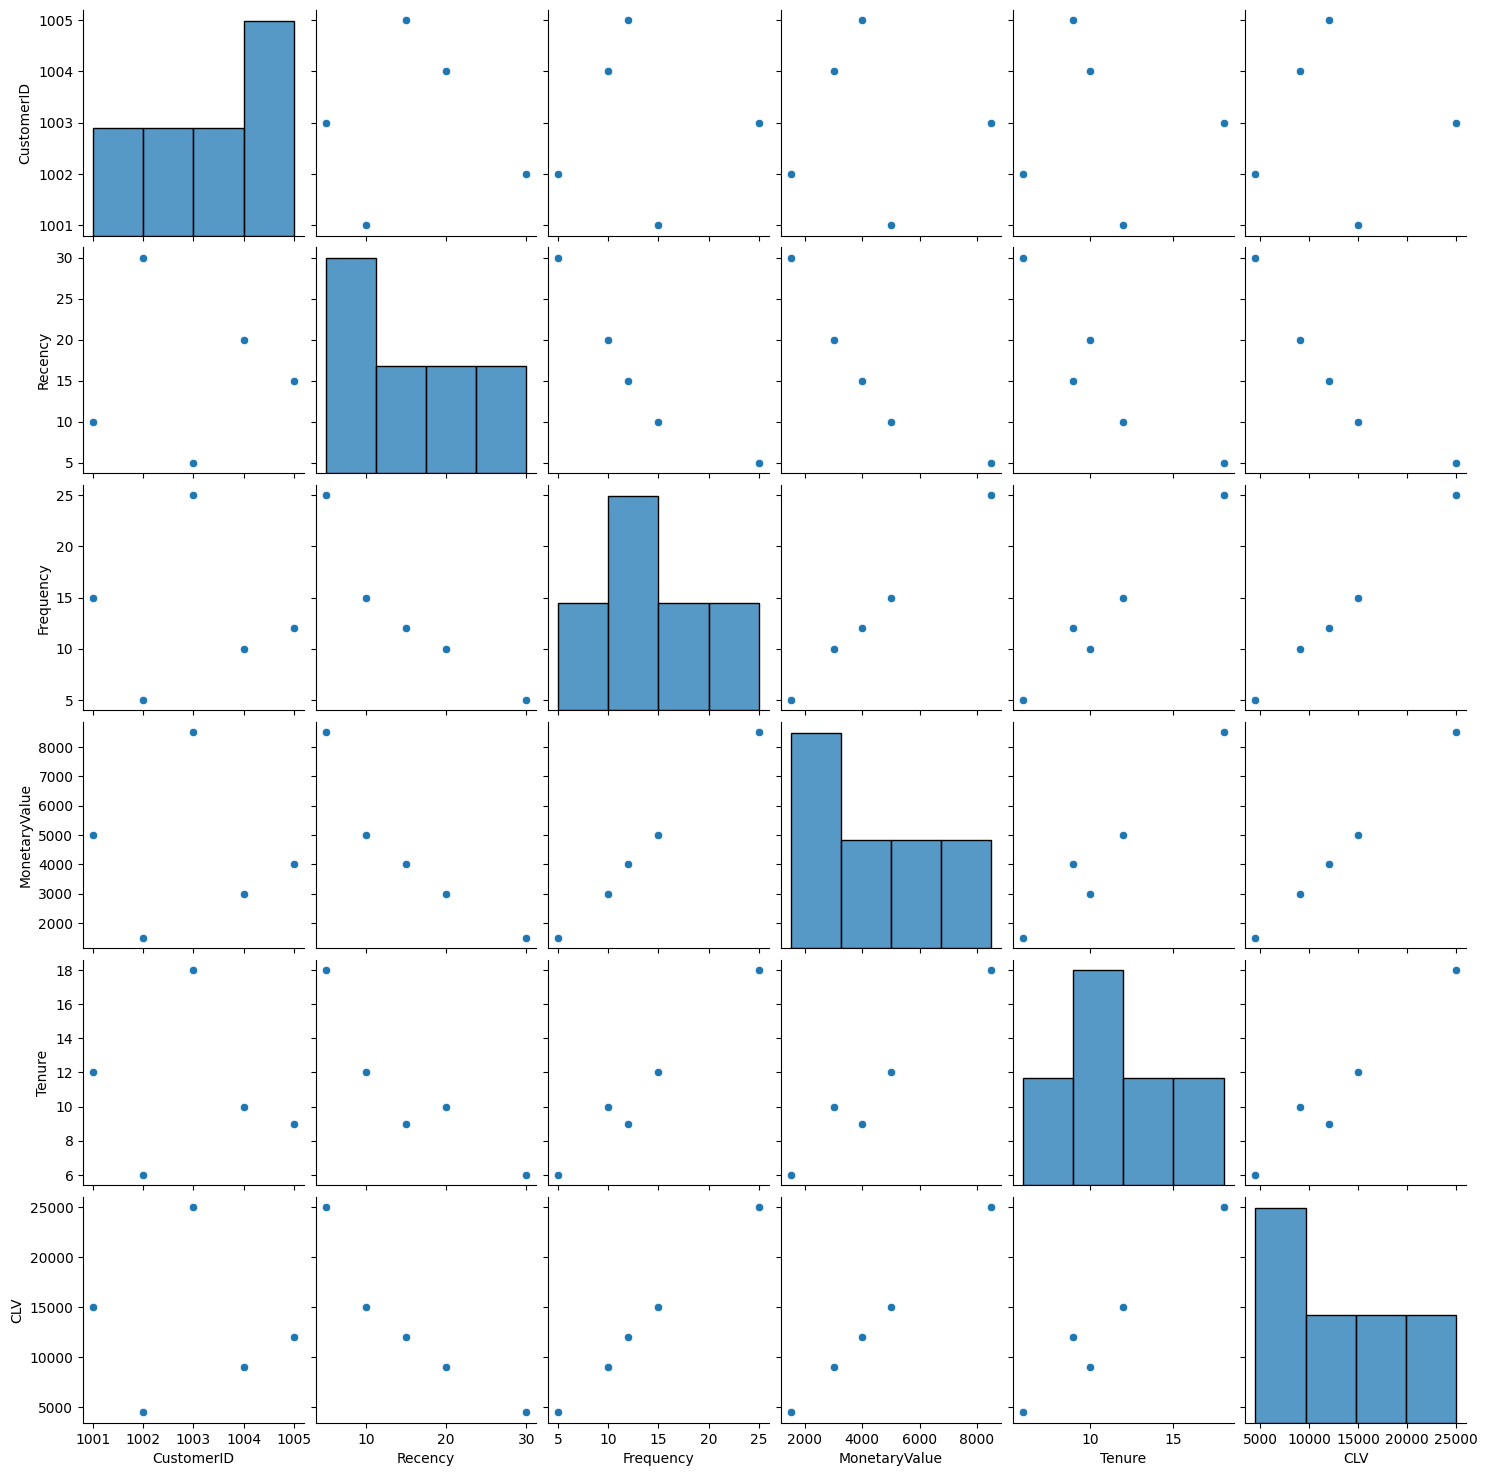

In [7]:
sns.pairplot(df)
plt.show()

In [4]:
X = df[['Recency', 'Frequency', 'MonetaryValue', 'Tenure']]
y = df['CLV']

# Ensure test set has at least 2 samples
if len(df) > 10:
    test_size = 0.2
else:
    test_size = 2 / len(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Handle R^2 calculation only if test set has 2 or more samples
if len(y_test) >= 2:
    r2 = r2_score(y_test, y_pred)
else:
    r2 = "N/A (too few test samples)"

print('MSE:', mse)
print('R^2 Score:', r2)


MSE: 24781000.0
R^2 Score: -0.7622044444444445


In [8]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)